In [1]:
%load_ext autoreload
%autoreload 2

In [33]:
import polars as pl
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt


In [5]:
data_path = Path("/Volumes/fsmresfiles/Basic_Sciences/Phys/Lerner_Lab_tnl2633/Gaby/Data Analysis/ActiveAvoidance/Core_guppy_postcross/core_data/compiled_timeseries_data/cage_312_mouse_313_day_7_compiled_timeseries_data.parquet")

In [6]:
data = pl.read_parquet(data_path)
data.head()

CueB,ShkB,AvdB,EspB,dff_D2,dff_DA,z_score_DA,z_score_D2,D1,D2,DA,cage,day,mouse_id
f64,f64,f64,f64,f64,f64,f64,f64,bool,bool,bool,i64,i64,i64
0.0,0.0,0.0,0.0,-2.806347,2.874116,2.439332,-2.833346,false,true,true,312,7,313
64.859996,-100.0,61.910057,-100.0,-2.801944,2.892246,2.454719,-2.8289,false,true,true,312,7,313
96.769966,-100.0,95.22004,-100.0,-2.797541,2.910368,2.4701,-2.824455,false,true,true,312,7,313
155.080131,-100.0,152.620073,-100.0,-2.793139,2.928477,2.485469,-2.820011,false,true,true,312,7,313
202.480189,-100.0,200.440218,-100.0,-2.788739,2.946564,2.50082,-2.81557,false,true,true,312,7,313


In [103]:
data = data.with_columns(
                         time =  np.linspace(0, data.shape[0]/1070, data.shape[0])
)


data

CueB,ShkB,AvdB,EspB,dff_D2,dff_DA,z_score_DA,z_score_D2,D1,D2,DA,cage,day,mouse_id,literal,time
f64,f64,f64,f64,f64,f64,f64,f64,bool,bool,bool,i64,i64,i64,bool,f64
0.0,0.0,0.0,0.0,-2.806347,2.874116,2.439332,-2.833346,false,true,true,312,7,313,false,0.0
64.859996,-100.0,61.910057,-100.0,-2.801944,2.892246,2.454719,-2.8289,false,true,true,312,7,313,false,0.000935
96.769966,-100.0,95.22004,-100.0,-2.797541,2.910368,2.4701,-2.824455,false,true,true,312,7,313,false,0.001869
155.080131,-100.0,152.620073,-100.0,-2.793139,2.928477,2.485469,-2.820011,false,true,true,312,7,313,false,0.002804
202.480189,-100.0,200.440218,-100.0,-2.788739,2.946564,2.50082,-2.81557,false,true,true,312,7,313,false,0.003738
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-100.0,-100.0,-100.0,-100.0,-1.532831,0.758938,0.644129,-1.547646,false,true,true,312,7,313,false,2088.554206
-100.0,-100.0,-100.0,-100.0,-1.536138,0.775034,0.65779,-1.550985,false,true,true,312,7,313,false,2088.55514
-100.0,-100.0,-100.0,-100.0,-1.539447,0.791133,0.671454,-1.554325,false,true,true,312,7,313,false,2088.556075


In [169]:

def compute_hot_encoded_ts(col:str, tolerance: float= .00045)-> np.array:
    # fetch time array
    time = data['time'].to_numpy()
    # filter col timestamps and create np array
    col_timestamps = data.filter(pl.col(col)>0)[col].to_numpy()
    #create matrix of tolerance values
    diff = time[:, np.newaxis] - col_timestamps
    encoded_ts = np.any(np.abs(diff) <= tolerance, axis = 1).astype(int)
    return encoded_ts

data = data.with_columns(
    cue_oh = compute_hot_encoded_ts('CueB'),
    shock_oh = compute_hot_encoded_ts('ShkB'),
    avoid_oh = compute_hot_encoded_ts('AvdB'),
    escape_oh = compute_hot_encoded_ts('EspB')
)
data

CueB,ShkB,AvdB,EspB,dff_D2,dff_DA,z_score_DA,z_score_D2,D1,D2,DA,cage,day,mouse_id,literal,time,cue_oh,shock_oh,avoid_oh,escape_oh
f64,f64,f64,f64,f64,f64,f64,f64,bool,bool,bool,i64,i64,i64,bool,f64,i64,i64,i64,i64
0.0,0.0,0.0,0.0,-2.806347,2.874116,2.439332,-2.833346,false,true,true,312,7,313,false,0.0,0,0,0,0
64.859996,-100.0,61.910057,-100.0,-2.801944,2.892246,2.454719,-2.8289,false,true,true,312,7,313,false,0.000935,0,0,0,0
96.769966,-100.0,95.22004,-100.0,-2.797541,2.910368,2.4701,-2.824455,false,true,true,312,7,313,false,0.001869,0,0,0,0
155.080131,-100.0,152.620073,-100.0,-2.793139,2.928477,2.485469,-2.820011,false,true,true,312,7,313,false,0.002804,0,0,0,0
202.480189,-100.0,200.440218,-100.0,-2.788739,2.946564,2.50082,-2.81557,false,true,true,312,7,313,false,0.003738,0,0,0,0
…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…,…
-100.0,-100.0,-100.0,-100.0,-1.532831,0.758938,0.644129,-1.547646,false,true,true,312,7,313,false,2088.554206,0,0,0,0
-100.0,-100.0,-100.0,-100.0,-1.536138,0.775034,0.65779,-1.550985,false,true,true,312,7,313,false,2088.55514,0,0,0,0
-100.0,-100.0,-100.0,-100.0,-1.539447,0.791133,0.671454,-1.554325,false,true,true,312,7,313,false,2088.556075,0,0,0,0


29

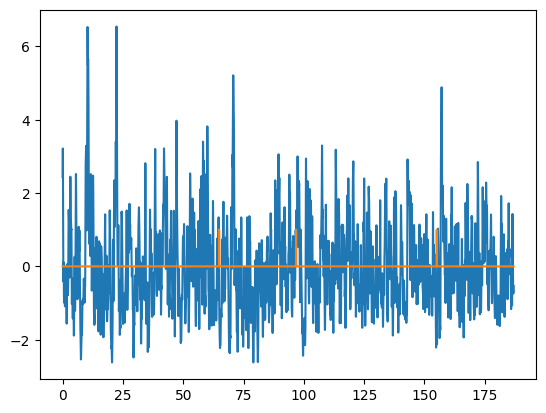

In [139]:
plt.plot(time[0:200000], data.select('z_score_DA')[:200000])
plt.plot(time[0:200000], binary_cues[:200000])